---
title: "Chapter 2"
author: "Eric Peña"
date: 2022-04-23T00:00:00-07:00
description: "Statistical Rethinking Chapter 2"
type: technical_note
draft: false
---

Code 2.3

In [59]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
plt.style.use('dark_background')

In [60]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
# az.style.use("arviz-darkgrid")

In [61]:
p_grid = np.linspace(0, 1, num=20)
prior = np.ones(20) # :: uniform
prior = [0 if p < 0.5 else 1 for p in p_grid] # :: step
prior = [np.exp(-5*np.abs(p - 0.5)) for p in p_grid] # :: exp
likelihood = stats.binom.pmf(6, 9, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / np.sum(unstd_posterior)

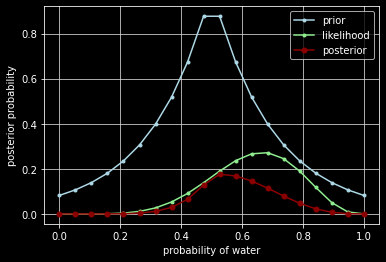

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(p_grid, prior, color='lightblue', marker='.', label='prior')
ax.plot(p_grid, likelihood, color='lightgreen', marker='.', label='likelihood')
ax.plot(p_grid, posterior, color='darkred', marker='.', markersize=10, label='posterior')
ax.set_xlabel('probability of water')
ax.set_ylabel('posterior probability')
ax.legend()
ax.grid(True, color='lightgray')
plt.show()

code 2.6

In [63]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform("p", 0, 1)  # uniform priors
    # binomial likelihood
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

# display summary of quadratic approximation
print("  Mean, Standard deviation\np {:.2}, {:.2}".format(
    mean_q["p"], std_q[0]))


  Mean, Standard deviation
p 0.67, 0.16


In [64]:
# Compute the 89% percentile interval
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1 - prob) / 2, (1 + prob) / 2])
pi = mean_q["p"] + std_q * z
print("5.5%, 94.5% \n{:.2}, {:.2}".format(pi[0], pi[1]))


5.5%, 94.5% 
0.42, 0.92


Text(0.5, 0, 'Proportion water')

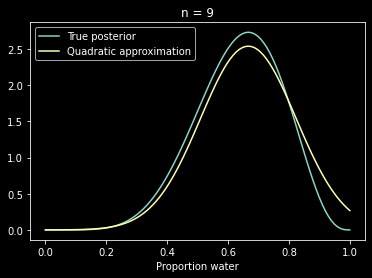

In [65]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.beta.pdf(x, w + 1, n - w + 1), label="True posterior")

# quadratic approximation
ax.plot(x, stats.norm.pdf(x, mean_q["p"],
         std_q), label="Quadratic approximation")
ax.legend(loc=0)

ax.set_title(f"n = {n}")
plt.xlabel("Proportion water")


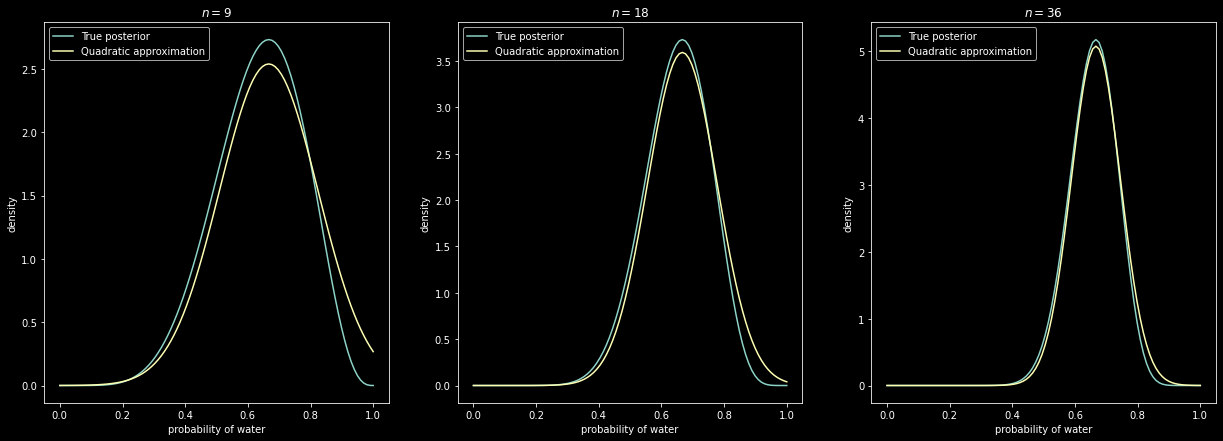

In [66]:
# Figure 2.8
x = np.linspace(0, 1, 100)
w, n = [6, 12, 24], [9, 18, 36]

fig, ax = plt.subplots(1, 3, figsize=(21, 7))

for idx, ps in enumerate(zip(w, n)):
    data = np.repeat((0, 1), (ps[1] - ps[0], ps[0]))
    with pm.Model() as normal_approximation:
        p = pm.Uniform("p", 0, 1)  # uniform priors
        # binomial likelihood
        w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())
        mean_q = pm.find_MAP()
        std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

    ax[idx].plot(x, stats.beta.pdf(x, ps[0] + 1, ps[1] -
                 ps[0] + 1), label="True posterior")
    ax[idx].plot(x, stats.norm.pdf(x, mean_q["p"], std_q),
                 label="Quadratic approximation")
    ax[idx].set_xlabel("probability of water")
    ax[idx].set_ylabel("density")
    ax[idx].set_title(r"$n={}$".format(ps[1]))
    ax[idx].legend(loc="upper left")

2M1.

In [43]:
grid = np.linspace(0, 1, 21)
prior = np.ones(21)
likelihood1 = stats.binom.pmf(3, 3, grid)
posterior1 = likelihood1*prior / np.sum(likelihood*prior)
likelihood2 = stats.binom.pmf(3, 4, grid)
posterior2 = likelihood2*prior / np.sum(likelihood*prior)
likelihood3 = stats.binom.pmf(5, 7, grid)
posterior3 = likelihood3*prior / np.sum(likelihood*prior)

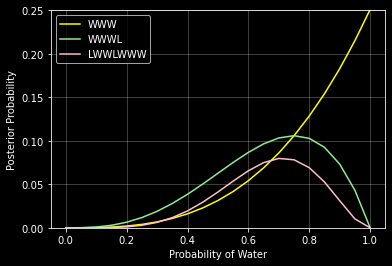

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(grid, posterior1, color='yellow', label='WWW')
ax.plot(grid, posterior2, color='lightgreen', label='WWWL')
ax.plot(grid, posterior3, color='pink', label='LWWLWWW')
ax.grid(True, color='white', alpha=0.3)
ax.set_xlabel('Probability of Water')
ax.set_ylabel('Posterior Probability')
ax.set_ylim(0, 0.25)
ax.legend()
plt.show()


2M2.

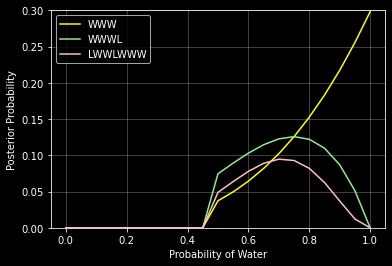

In [55]:
grid = np.linspace(0, 1, 21)
prior = [0 if p < 0.5 else 1 for p in grid]
likelihood1 = stats.binom.pmf(3, 3, grid)
posterior1 = likelihood1*prior / np.sum(likelihood*prior)
likelihood2 = stats.binom.pmf(3, 4, grid)
posterior2 = likelihood2*prior / np.sum(likelihood*prior)
likelihood3 = stats.binom.pmf(5, 7, grid)
posterior3 = likelihood3*prior / np.sum(likelihood*prior)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(grid, posterior1, color='yellow', label='WWW')
ax.plot(grid, posterior2, color='lightgreen', label='WWWL')
ax.plot(grid, posterior3, color='pink', label='LWWLWWW')
ax.grid(True, color='white', alpha=0.3)
ax.set_xlabel('Probability of Water')
ax.set_ylabel('Posterior Probability')
ax.set_ylim(0, 0.3)
ax.legend()
plt.show()

2M3.

Suppose two globes. One for Earth and one for Mars. Earth has 70% water. Mars is 100% land. One of the globes (don't know which) was tossed in the air and produced a 'land' observation. Assume each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing 'land' (P(Earth|Land)), is 0.23.

$$P(Earth|Land) = \frac{P(Land | Earth) \cdot P(Earth)}{P(Land)}$$
$$P(Earth|Land) = \frac{0.3 \cdot 0.5}{P(Land)} = \frac{0.15}{P(Land)}$$
$$P(Land) = P(Land|Earth)\cdot P(Earth) + P(Land|Mars)\cdot P(Mars)$$
$$P(Land) = 0.3\cdot 0.5 + 1\cdot 0.5 = 0.65$$
$$P(Earth|Land) = \frac{0.15}{0.65} = 0.23076923076923075$$

2M4.

* Deck with three cards.
* Each card has two sides.
* Each side is black or white.
* One card has two black sides.
* Second card has one black and one white.
* Third cards has two white sides.
* Cards shuffled.
* Card drawn with black facing up.
* Show other side being black is 2/3.

$$C_1  \rightarrow (B,W), C_2  \rightarrow (B,B), C_3  \rightarrow (W,W)$$

There are 3 ways of getting a black side facing upward and there are only two ways that this can happen where black is also on the other side: $\frac{2}{3}$.

2M5.

$$C_1  \rightarrow (B,W), C_2  \rightarrow (B,B), C_3  \rightarrow (W,W), C_4 \rightarrow (B,B)$$

$$P = \frac{4}{5}$$

2M6.

* Black sides are heavier than cards with white sides.
* Pulling black card from bag is less likely
* For every way to pull the BB card from the bag, there are 2 ways to pull the BW card and 3 ways to pull the WW card. 

$$2 \cdot P_{BB} = P_{BW}$$
$$3 \cdot P_{BB} = P_{WW}$$
$$P_{BB} = \frac{1}{1+2+3}$$
$$P_{BW} = \frac{2}{1+2+3}$$
$$P_{WW} = \frac{3}{1+2+3}$$
$$P(B) = P(B|BB)\cdot P(BB) + P(B|BW)\cdot P(BW) + P(B|WW)\cdot P(WW)$$
$$P(BB|B) = \frac{P(B|BB)\cdot P(BB)}{P(B)} = \frac{1}{2}$$

2M7.

$$P(BB | B_1, W_2) = \frac{P(B_1, W_2 | BB)\cdot P(BB)}{P(B_1, W_2)}$$

2H1.

$$P(t_2, | t_1) = P(t_2 | t_1, A) \cdot P(A | t_1) + P(t_2 | t_1, B) \cdot P(B | t_1)$$

* The problem gave us the information that $P(t|A) = 0.1$ and $P(t|B) = 0.2$:
* Since giving twins is an inpendent event, then we know $P(t_2 | t_1, A) = P(t_2 | A)$ and same for $B$.
* Look specifically at $P(A | t_1)$ and $P(A | t_2)$:
$$P(A | t_1) = \frac{P(t_1 | A) \cdot P(A)}{P(t_1)}$$
$$P(A | t_1) = \frac{P(t_1 | A) \cdot P(A)}{P(t_1|A)\cdot P(A) + P(t_1|B)\cdot P(B)}$$

$$P(t_2, | t_1) = P(t_2 | A) \cdot \left( \frac{P(t_1 | A) \cdot P(A)}{P(t_1|A)\cdot P(A) + P(t_1|B)\cdot P(B)} \right) + P(t_2 | B) \cdot \left( \frac{P(t_1 | B) \cdot P(B)}{P(t_1|A)\cdot P(A) + P(t_1|B)\cdot P(B)} \right) = \frac{1}{6}$$

2H2.

$$P(A | t) = \frac{P(t | A) \cdot P(A)}{P(t|A)\cdot P(A) + P(t|B)\cdot P(B)} = \frac{3}{20}$$

2H3.

Panda mother has a second bith and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is of species A.

$$P(A | s_2, t_1) = \frac{P(s_2, t_1 | A) \cdot P(A)}{P(s_2, t_1)}$$
Since giving births is independent: $P(s_2, t_1 | A) = P(s_2 | A) \cdot P(t_1 | A)$

Determining denominator $P(s_2, t_1)$:
$$P(s_2, t_1) = P(s_2, t_1 | A) \cdot P(A) + P(s_2, t_1 | B) \cdot P(B)$$
$$P(s_2, t_1) = P(s_2 | A) \cdot P(t_1 | A) \cdot P(A) + P(s_2 | B) \cdot P(t_1 | B) \cdot P(B)$$
Putting it all together:
$$P(A | s_2, t_1) = \frac{P(s_2 | A) \cdot P(t_1 | A) \cdot P(A)}{P(s_2 | A) \cdot P(t_1 | A) \cdot P(A) + P(s_2 | B) \cdot P(t_1 | B) \cdot P(B)}$$
$$\frac{(0.9\cdot 0.1\cdot 0.5)}{(0.9\cdot 0.1\cdot 0.5) + (0.8\cdot 0.2\cdot 0.5)} = 36\%$$

2H4.

Information about the genetic testing:
* The probability it correctly identifies a species A panda is 0.8
* The probability it correctly identifies a special B panda is 0.65
The test is positive for species A. If we ignore the data and calculate the posterior:
$$P(A | +_A) = \frac{P(+_A | A) \cdot P(A)}{P(+_A)} = \frac{P(+_A | A) \cdot P(A)}{P(+_A | A) \cdot P(A) + P(+_A | B) \cdot P(B)}$$
$$P(A | +_A) = \frac{0.8}{0.8 + 0.35} = 0.72\\%$$

If we incorporate the data: $s_2$ and $t_1$:
$$P(A | +_A, s_2, t_1) = \frac{P(+_A, s_2, t_1 | A) \cdot P(A)}{P(+_A, s_2, t_1)}$$
$$P(A | +_A, s_2, t_1) = \frac{P(+_A |A)\cdot P(s_2|A) \cdot P(t_1 | A) \cdot P(A)}{P(+_A |A)\cdot P(s_2|A) \cdot P(t_1 | A) \cdot P(A) + P(+_A |B)\cdot P(s_2|B) \cdot P(t_1 | B) \cdot P(B)} = 56.25\\%$$